In [1]:
# install PyRadiomics if not installed already
!pip install pyradiomics

     |████████████████████████████████| 188 kB 4.9 MB/s 
     |████████████████████████████████| 48.4 MB 14 kB/s 
     |████████████████████████████████| 109 kB 49.4 MB/s 
     |████████████████████████████████| 546 kB 47.6 MB/s 


In [2]:
# importing libraries
from __future__ import print_function
import sys
import os
import collections
import SimpleITK as sitk
import logging
import six
import radiomics
from radiomics import featureextractor, getFeatureClasses, getTestCase, firstorder, glcm, imageoperations, shape, glrlm, glszm
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Get the testCase
imagePath, maskPath = radiomics.getTestCase('brain1')

if imagePath is None or maskPath is None:  # Something went wrong, in this case PyRadiomics will also log an error
    raise Exception('Error getting testcase!')  # Raise exception to prevent cells below from running in case of "run all"

# # Additonally, store the location of the example parameter file, stored in \pyradiomics\examples/exampleSettings
# paramPath = os.path.join('..', 'examples', 'exampleSettings', 'Params.yaml')
# print('Parameter file, absolute path:', os.path.abspath(paramPath))

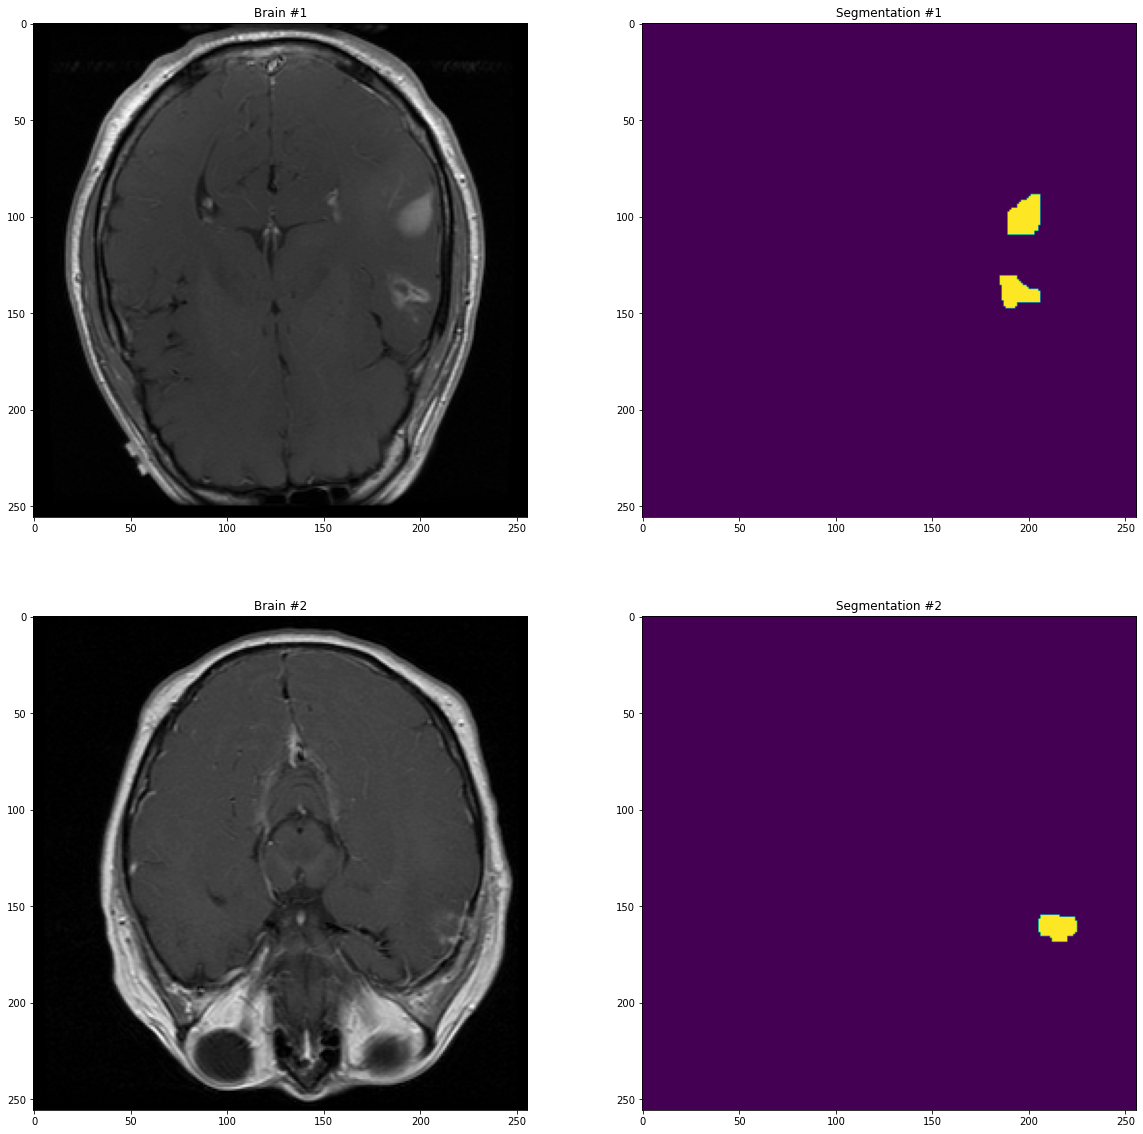

In [4]:
imagepath_1, labelpath_1 = getTestCase('brain1')
imagepath_2, labelpath_2 = getTestCase('brain2')

image_1 = sitk.ReadImage(imagepath_1)
label_1 = sitk.ReadImage(labelpath_1)
image_2 = sitk.ReadImage(imagepath_2)
label_2 = sitk.ReadImage(labelpath_2)

# Display the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# First image
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:], cmap="gray")
plt.title("Brain #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(label_1)[12,:,:])        
plt.title("Segmentation #1")

# Second image
plt.subplot(2,2,3)
plt.imshow(sitk.GetArrayFromImage(image_2)[8,:,:], cmap="gray")
plt.title("Brain #2")

plt.subplot(2,2,4)
plt.imshow(sitk.GetArrayFromImage(label_2)[8,:,:])        
plt.title("Segmentation #2")

plt.show()

In [ ]:
# First define the settings of extractor
settings = {}
settings['binWidth'] = 25
settings['resampledPixelSpacing'] = None
# settings['resampledPixelSpacing'] = [3, 3, 3]  # This is an example for defining resampling (voxels with size 3x3x3mm)
settings['interpolator'] = 'sitkBSpline'
settings['verbose'] = True
extractor = featureextractor.RadiomicsFeatureExtractor(**settings)
print('Extraction parameters:\n\t', extractor.settings)

# Enable a filter (in addition to the 'Original' filter already enabled)
extractor.enableImageTypeByName('LoG')
print('')
print('Enabled filters:\n\t', extractor.enabledImagetypes)

# Specify feature classes, all are enabled by default
extractor.disableAllFeatures()
extractor.enableAllFeatures()
#extractor.enableFeatureClassByName('firstorder')

# Specify some additional features in the GLCM feature class
#extractor.enableFeaturesByName(glcm=['Autocorrelation', 'Homogeneity1', 'SumSquares'])
print('')
print('Enabled features:\n\t', extractor.enabledFeatures)


Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 25, 'verbose': True}

Enabled filters:
	 {'Original': {}, 'LoG': {}}

Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': [], 'shape2D': []}


In [ ]:
# Extract features
result = extractor.execute(imagePath, maskPath)
print('Result type:', type(result))  # result is returned in a Python ordered dictionary)
print('')
print('Calculated features')
for key, value in six.iteritems(result):
    print('\t', key, ':', value)

parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Result type: <class 'collections.OrderedDict'>

Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0.1
	 diagnostics_Versions_Numpy : 1.21.5
	 diagnostics_Versions_SimpleITK : 2.1.1
	 diagnostics_Versions_PyWavelet : 1.2.0
	 diagnostics_Versions_Python : 3.7.12
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 25, 'verbose': True}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}, 'LoG': {}}
	 diagnostics_Image-original_Hash : 5c9ce3ca174f0f8324aa4d277e0fef82dc5ac566
	 diagnostics_Image-original_Dimensionality : 3D
	 diagnostics_Image-original_Spacing : (0.7812499999999999, 0.7812499999999999, 6.499999999999998)
	 diagnostics_Image-or